# Udacity AB Testing example

## Import packages

In [1]:
import pandas as pd #import the pandas module
import numpy as np #import numpy module

In [24]:
#packages for t-test
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [29]:
#to visualize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 

## Read in data into dataframe

In [2]:
#read the csv into a dataframe
df = pd.read_csv ('/Users/jeangelj/Documents/ab_testing/customerserviceabtestdata.csv', sep=',')

In [3]:
df.head()

,RecordID,Phone Number,AutomatedFlag,CS Rating
0,1,(733) 308-5171,1,2
1,2,(737) 479-9819,0,5
2,3,(571) 837-6630,0,4
3,4,(746) 481-2200,0,5
4,5,(224) 126-2105,1,4


In [25]:
#create arrays that we will use for t-test
cat1 = df[df['AutomatedFlag']==1]
cat2 = df[df['AutomatedFlag']==0]

## Distribution 

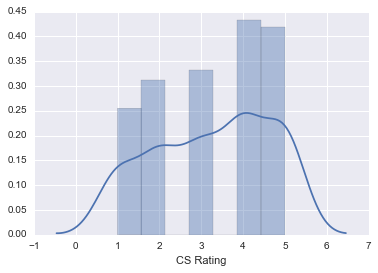

In [30]:
sns.distplot(cat1['CS Rating'])

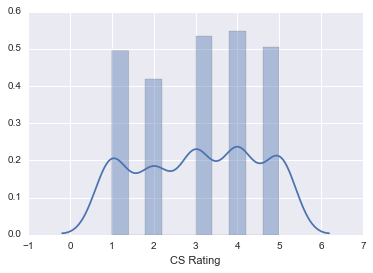

In [31]:
sns.distplot(cat2['CS Rating'])

## Methods for t-test

### 1. scipy's t-test

In [11]:
ttest_ind(cat1['CS Rating'], cat2['CS Rating'])

Ttest_indResult(statistic=1.8999728190974796, pvalue=0.057724706257127563)

In [19]:
# let's clean it up a little bi
t, p = ttest_ind(cat1['CS Rating'], cat2['CS Rating'], equal_var=False)
print("t-test: t = %g  p = %g" % (t, p))

t-test: t = 1.91942  p = 0.0555979


### 2. manually

In [22]:
# manually
abar = cat1['CS Rating'].mean()
avar = cat1['CS Rating'].var(ddof=1)
na = cat1['CS Rating'].size
adof = na - 1

bbar = cat2['CS Rating'].mean()
bvar = cat2['CS Rating'].var(ddof=1)
nb = cat2['CS Rating'].size
bdof = nb - 1

# Use the formulas directly.
tf = (abar - bbar) / np.sqrt(avar/na + bvar/nb)
dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
pf = 2*stdtr(dof, -np.abs(tf))

print("t-test: t = %g  p = %g" % (tf, pf))

t-test: t = 1.91942  p = 0.0555979


### 3. manually + scipy

In [23]:
# Use scipy.stats.ttest_ind_from_stats.
t2, p2 = ttest_ind_from_stats(abar, np.sqrt(avar), na,
                              bbar, np.sqrt(bvar), nb,
                              equal_var=False)
print("t-test: t = %g  p = %g" % (t2, p2))

t-test: t = 1.91942  p = 0.0555979


Conclusion: p-value is above 0.05, so we can't say that the difference is considered statistically significant. We need to increase the sample size and the duration of the experiment.